In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import scipy.optimize
import scipy.spatial
from IPython import display
from ipywidgets import interact ,widgets
import scipy.stats as stats
import math

In [8]:
from sklearn.datasets import fetch_20newsgroups_vectorized

In [9]:
news=fetch_20newsgroups_vectorized()

In [10]:
X=news.data
y=news.target

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

# LOGISTIC  REGRESSION #

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [16]:
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
lr.score(X_test,y_test)

0.7782032400589102

In [18]:
y_predicted=lr.predict(X_test)
from sklearn.metrics import confusion_matrix

In [19]:
cm=confusion_matrix(y_test,y_predicted)

In [20]:
cm

array([[101,   1,   0,   0,   0,   1,   2,   2,   1,   4,   0,   3,   0,
          0,   1,  13,   1,   6,   2,   1],
       [  1, 117,   9,   3,   6,   7,   9,   2,   1,   1,   0,   1,   3,
          2,   4,   0,   0,   1,   1,   0],
       [  0,   8, 122,  11,   4,  10,   4,   4,   1,   0,   0,   1,   5,
          0,   0,   0,   0,   1,   1,   0],
       [  0,   8,   9, 121,   5,   3,   6,   2,   1,   2,   1,   0,  11,
          1,   0,   0,   0,   0,   0,   0],
       [  0,   3,   2,  17, 112,   4,   8,   0,   1,   2,   0,   2,   8,
          1,   0,   0,   0,   1,   1,   0],
       [  1,   9,   5,   3,   1, 153,   2,   0,   1,   3,   1,   2,   3,
          2,   0,   1,   0,   1,   0,   0],
       [  0,   1,   1,   4,   2,   2, 149,   4,   2,   1,   0,   0,   6,
          2,   2,   1,   2,   1,   1,   0],
       [  0,   4,   2,   3,   0,   4,   3, 150,  11,   4,   3,   0,   4,
          0,   0,   1,   1,   1,   0,   0],
       [  0,   1,   1,   1,   3,   2,   7,   3, 148,   2,   0,  

Text(69.0, 0.5, 'truth')

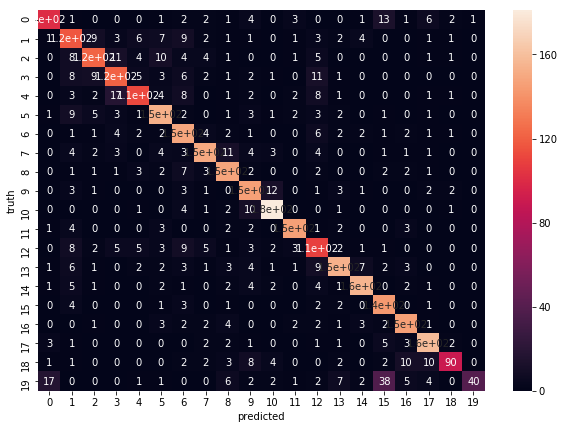

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [22]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[26 67 35 47 30 48 68 31 45 53 28 16 64 30 21 68 32 32 11  1] [38 51 50 49 50 35 32 41 27 29 20 18 50 46 26 14 23 21 45 88] [101 117 122 121 112 153 149 150 148 146 181 146 109 154 155 143 146 159
  90  40] [3230 3160 3188 3178 3203 3159 3146 3173 3175 3167 3166 3215 3172 3165
 3193 3170 3194 3183 3249 3266]


In [23]:
n=len(FP)

In [24]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[127, 184, 157, 168, 142, 201, 217, 181, 193, 199, 209, 162, 173, 184, 176, 211, 178, 191, 101, 41]


In [25]:
d01=pd.DataFrame(FP,columns=['logisticregfp'])
d02=pd.DataFrame(TP,columns=['logisticregtp'])
d=pd.DataFrame(M,columns=['logisticreg'])

# DECISION  TREE #

In [26]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [27]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
model.score(X_test,y_test)

0.6182621502209131

In [29]:
y_predicted=model.predict(X_test)

In [30]:
cm=confusion_matrix(y_test,y_predicted)

In [31]:
cm

array([[ 78,   0,   0,   4,   5,   1,   0,   4,   2,   3,   1,   2,   0,
          4,   2,  10,   2,   1,   3,  17],
       [  1,  84,  14,  13,  12,   6,   3,  11,   2,   3,   3,   1,   5,
          2,   2,   0,   2,   0,   1,   3],
       [  1,   9, 111,  11,   3,  12,   2,   1,   2,   2,   0,   3,   4,
          2,   1,   3,   2,   0,   1,   2],
       [  2,  16,  13,  72,   9,   9,   9,   6,   2,   1,   5,   1,   8,
          6,   1,   3,   1,   1,   4,   1],
       [  1,   8,   1,  15,  88,   6,   6,   3,   3,   1,   3,   3,   9,
          1,   2,   5,   3,   0,   4,   0],
       [  0,  20,  15,   6,   5, 115,   1,   6,   2,   0,   3,   0,   5,
          1,   2,   2,   1,   2,   2,   0],
       [  0,   5,   3,   9,   7,   0, 120,   9,   2,   5,   2,   2,   8,
          2,   1,   2,   1,   0,   3,   0],
       [  1,   1,   5,   6,   5,   3,   7, 107,  14,  13,   2,   2,   5,
          6,   4,   4,   1,   0,   2,   3],
       [  1,   2,   0,   4,   0,   2,   2,   6, 120,   9,   2,  

Text(69.0, 0.5, 'truth')

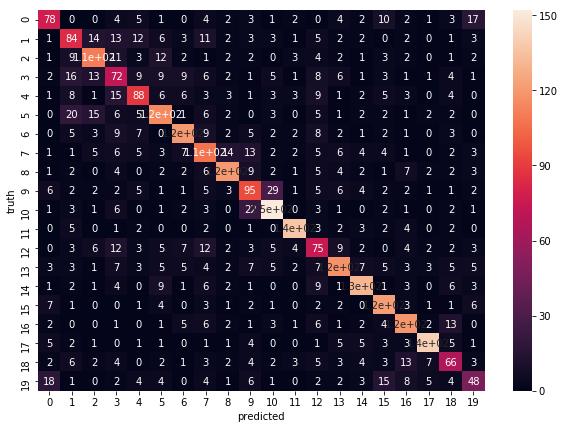

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [33]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[ 52  89  65 107  65  72  52  95  45  88  67  26  92  60  47  67  64  27
  63  53] [61 84 61 98 74 73 61 84 55 80 49 27 84 82 50 35 50 39 69 80] [ 78  84 111  72  88 115 120 107 120  95 152 137  75 118 131 122 119 141
  66  48] [3204 3138 3158 3118 3168 3135 3162 3109 3175 3132 3127 3205 3144 3135
 3167 3171 3162 3188 3197 3214]


In [34]:
n=len(FP)

In [35]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[130, 173, 176, 179, 153, 187, 172, 202, 165, 183, 219, 163, 167, 178, 178, 189, 183, 168, 129, 101]


In [36]:
d1=pd.DataFrame(M,columns=['decisiontree'])
d11=pd.DataFrame(FP,columns=['decisiontreefp'])
d12=pd.DataFrame(TP,columns=['decisiontreetp'])

# KNN(7) #

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier(n_neighbors=5)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
knn.score(X_test,y_test)

0.5540500736377025

In [47]:
y_predicted=knn.predict(X_test)

In [48]:
cm=confusion_matrix(y_test,y_predicted)

In [49]:
cm

array([[ 98,   1,   0,   1,   0,   0,   0,   0,   1,   2,   0,   1,   0,
          0,   0,  14,   3,   3,  13,   2],
       [ 14,  89,   9,   3,   3,  12,   2,   2,   1,   1,   1,   2,   0,
          6,   3,   6,   4,   3,   6,   1],
       [ 10,  12,  91,  11,   0,  19,   2,   7,   0,   2,   1,   1,   3,
          0,   0,   1,   2,   2,   7,   1],
       [ 13,  13,  13,  69,   4,  14,   4,   1,   0,   0,   0,   4,   2,
          4,   2,  15,   1,   6,   4,   1],
       [ 26,   9,   8,  13,  54,   8,   2,   4,   0,   0,   0,   3,   2,
          1,   1,  13,   2,   5,  10,   1],
       [ 13,   3,   1,   6,   5, 121,   1,   2,   0,   2,   1,  14,   2,
          3,   1,   4,   1,   2,   3,   3],
       [ 10,  22,   5,   6,   4,   4,  79,   4,   1,   1,   4,   5,   4,
          6,   3,   6,   5,   7,   4,   1],
       [ 17,   8,   4,   9,   1,   8,   4,  94,   4,   1,   2,   0,   0,
          1,   0,   9,   4,   8,  15,   2],
       [ 12,   5,   5,   9,   4,   7,   0,   7,  91,   3,   0,  

Text(69.0, 0.5, 'truth')

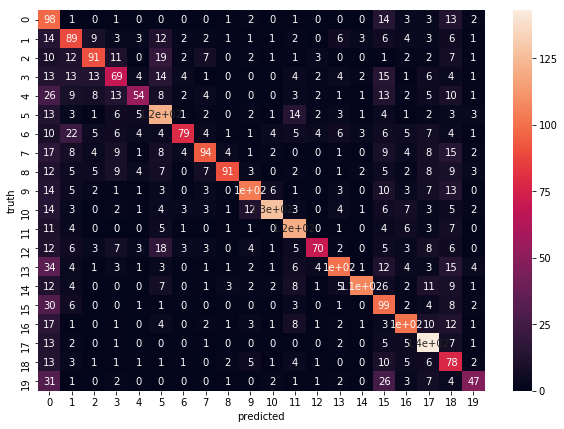

In [50]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [51]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[316 112  52  76  29 118  23  41  17  41  23  71  21  44  15 160  64 106
 157  28] [ 41  79  81 101 108  67 102  97  84  72  74  44  89 100  74  58  68  37
  57  81] [ 98  89  91  69  54 121  79  94  91 103 127 120  70 100 107  99 101 143
  78  47] [2940 3115 3171 3149 3204 3089 3191 3163 3203 3179 3171 3160 3215 3151
 3199 3078 3162 3109 3103 3239]


In [52]:
n=len(FP)

In [53]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[414, 201, 143, 145, 83, 239, 102, 135, 108, 144, 150, 191, 91, 144, 122, 259, 165, 249, 235, 75]


In [54]:
d2=pd.DataFrame(M,columns=['knn'])
d21=pd.DataFrame(FP,columns=['knnfp'])
d22=pd.DataFrame(TP,columns=['knntp'])

# RANDOM FOREST #

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model=RandomForestClassifier(n_estimators=35)

In [57]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
y_predicted=model.predict(X_test)

In [59]:
model.score(X_test,y_test)

0.7714285714285715

In [60]:
cm=confusion_matrix(y_test,y_predicted)

In [61]:
cm

array([[107,   1,   0,   0,   2,   0,   0,   1,   0,   1,   0,   1,   0,
          2,   2,  19,   2,   0,   1,   0],
       [  1, 115,  13,   4,   9,   5,   6,   2,   1,   0,   1,   0,   5,
          0,   6,   0,   0,   0,   0,   0],
       [  1,   9, 142,   8,   0,   2,   2,   2,   0,   1,   0,   1,   4,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   9,  25,  96,  15,   4,  10,   2,   0,   0,   1,   3,   4,
          1,   0,   0,   0,   0,   0,   0],
       [  0,   6,   5,  20, 111,   3,   9,   1,   1,   0,   0,   1,   3,
          1,   0,   1,   0,   0,   0,   0],
       [  0,  16,  16,   7,   2, 143,   0,   0,   1,   0,   0,   1,   2,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2,   3,   4,   2, 154,   4,   0,   0,   2,   1,   5,
          1,   1,   0,   0,   1,   1,   0],
       [  0,   5,   7,   6,   5,   1,   5, 143,   4,   1,   1,   1,   6,
          0,   1,   1,   2,   0,   2,   0],
       [  2,   2,   0,   1,   2,   1,   6,   3, 151,   0,   1,  

In [62]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[31 81 81 75 57 37 62 38 16 32 32 34 60 19 17 67 13 13  9  2] [32 53 30 74 51 45 27 48 24 27 16 14 67 51 26 14 18 19 55 85] [107 115 142  96 111 143 154 143 151 148 185 150  92 149 155 143 151 161
  80  43] [3225 3146 3142 3150 3176 3170 3152 3166 3204 3188 3162 3197 3176 3176
 3197 3171 3213 3202 3251 3265]


In [63]:
n=len(FP)

In [64]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[138, 196, 223, 171, 168, 180, 216, 181, 167, 180, 217, 184, 152, 168, 172, 210, 164, 174, 89, 45]


In [65]:
d3=pd.DataFrame(M,columns=['rf'])
d31=pd.DataFrame(FP,columns=['rffp'])
d32=pd.DataFrame(TP,columns=['rftp'])

# SUPPORT VECTOR  MACHINE #

In [73]:
from sklearn.svm import SVC

In [79]:
model=SVC(random_state=35)
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=35,
  shrinking=True, tol=0.001, verbose=False)

In [80]:
y_predicted=model.predict(X_test)

In [81]:
model.score(X_test,y_test)

0.046244477172312226

In [82]:
cm=confusion_matrix(y_test,y_predicted)

In [83]:
cm

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 139,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 168,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 172,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 170,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 162,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 188,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 181,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 191,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [84]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(FP,FN,TP,TN)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 3238    0    0    0    0] [139 168 172 170 162 188 181 191 175 175 201 164 159 200 181   0 169 180
 135 128] [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 157   0   0
   0   0] [3256 3227 3223 3225 3233 3207 3214 3204 3220 3220 3194 3231 3236 3195
 3214    0 3226 3215 3260 3267]


D:\anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [85]:
M=[]
for i in range(0,n):
    M.append(FP[i]+TP[i])
print(M)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3395, 0, 0, 0, 0]


In [86]:
d4=pd.DataFrame(M,columns=['svm'])
d41=pd.DataFrame(FP,columns=['svmfp'])
d42=pd.DataFrame(TP,columns=['svmtp'])


# MLP #

In [87]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp=MLPClassifier(random_state=37)
mlp.fit(X_train,y_train)

In [ ]:
mlp.score(X_train,y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled=scaler.fit(X_test).transform(X_test)
mlp=MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)

In [ ]:
mlp.score(X_train_scaled,y_train)

In [ ]:
mlp.score(X_test_scaled,y_test)

In [ ]:
y_predicted=mlp.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_predicted)

In [ ]:
cm